Christopher Chon  
SID: 25235758

# Homework 1  
Collaborators: Tanay Nathan, Stefan Palombo, David Ko

# PROBLEM 1: Data Partitioning

For the MNIST dataset, the `mnist(filepath)` function was implemented and used. This function set aside 10,000 training images as a validation set. For the Spam dataset, the `spam(filepath)` function was implemented and used. This function set aside 20% training samples as a validation set. Finally for the CIFAR-10 dataset, the `cifar10(filepath)` function was implemented and used. For this 5,000 training images were set aside as a validation set. NumPy and SciPy were mainly used for this problem. In order to have a validation set that would have all classes represented, the training images were all selected pseudo-randomly by taking the allocated number of training images from the top after running `np.random.shuffle` on the datasets.

In [103]:
import numpy as np
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [104]:
MNIST_FILEPATH = "hw01_data/mnist/train.mat"
NUM_MNIST_TRAINING_IMAGES = 10000
SPAM_FILEPATH = "hw01_data/spam/spam_data.mat"
FRAC_SPAM_TRAINING = 0.2
CIFAR10_FILEPATH = "hw01_data/cifar/train.mat"
NUM_CIFAR_TRAINING_IMAGES = 5000

In [105]:
def mnist(filepath):
    data = sio.loadmat(filepath)["trainX"]
    np.random.shuffle(data)
    order = np.arange(data.shape[1] - 1)
    training_data = np.take(data, order, 1)
    labels = np.take(data, [-1], 1)
    return training_data[:NUM_MNIST_TRAINING_IMAGES], labels[:NUM_MNIST_TRAINING_IMAGES], \
            training_data[NUM_MNIST_TRAINING_IMAGES:], labels[NUM_MNIST_TRAINING_IMAGES:]
    
def print_mnist(arr, label):
    mnist_image = ""
    for x in range(28 * 28 - 1):
        if x % 28 == 0:
            mnist_image += '\n'
        if (arr[x] == 0):
            mnist_image += ' '
        else:
            mnist_image += '*'
    print(mnist_image)
    print(label)
    
def spam(filepath):
    data = sio.loadmat(filepath)
    order = np.arange(data["training_data"].shape[0])
    np.random.shuffle(order)
    training_data = np.take(data["training_data"], order, 0)
    labels = np.take(data["training_labels"], order, 1).T
    
    num_validation = int(labels.shape[0] * FRAC_SPAM_TRAINING)
    return training_data[:num_validation], labels[:num_validation], \
            training_data[num_validation:], labels[num_validation:]

def cifar10(filepath):
    data = sio.loadmat(filepath)["trainX"]
    np.random.shuffle(data)
    order = np.arange(data.shape[1] - 1)
    training_data = np.take(data, order, 1)
    labels = np.take(data, [-1], 1)
    return training_data[:NUM_CIFAR_TRAINING_IMAGES], labels[:NUM_CIFAR_TRAINING_IMAGES], \
            training_data[NUM_CIFAR_TRAINING_IMAGES:], labels[NUM_CIFAR_TRAINING_IMAGES:]

In [106]:
mnist_data = mnist(MNIST_FILEPATH)
spam_data = spam(SPAM_FILEPATH)
cifar10_data = cifar10(CIFAR10_FILEPATH)

# PROBLEM 2: Training Linear SVM

Linear Support Vector Machines (SVMs) were trained on each of the training datasets given in the previous problem and validated against the validation set partitioned from the training set. The particular Linear SVM used was `sklearn.svm(kernel='linear')`.

## MNIST

For the MNIST dataset, seven Linear SVMs were trained on the MNIST dataset sample sizes of 100, 200, 500, 1,000, 2,000, 5,000, and 10,000.

In [107]:
def mnist_learn(vd, vl, td, tl, sample_sizes):
    linearsvms = {}
    for num_samples in sample_sizes:
        s = SVC(kernel='linear')
        s.fit(np.take(td, np.arange(num_samples), 0), np.ravel(np.take(tl, np.arange(num_samples), 0)))
        linearsvms[num_samples] = s
    return linearsvms

In [108]:
mnist_vd, mnist_vl, mnist_td, mnist_tl = mnist(MNIST_FILEPATH)
mnist_linearsvms = mnist_learn(mnist_vd, mnist_vl, mnist_td, mnist_tl, [100, 200, 500, 1000, 2000, 5000, 10000])

### Training

The printed values are the sample size with the training accuracy score on the MNIST dataset.

In [109]:
mnist_training_sample_sizes, mnist_training_error_rate = [], []
for k, s in mnist_linearsvms.items():
    mnist_training_score = s.score(mnist_td, mnist_tl)
    print(k, mnist_training_score)
    mnist_training_sample_sizes.append(k)
    mnist_training_error_rate.append(1 - mnist_training_score)

2000 0.9
1000 0.88322
5000 0.91502
500 0.85698
200 0.82502
100 0.72036
10000 0.9271


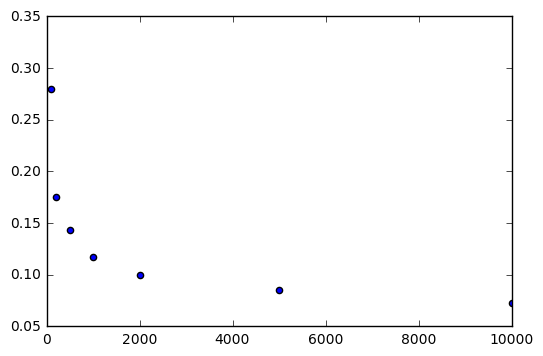

In [112]:
plt.scatter(mnist_training_sample_sizes, mnist_training_error_rate)
plt.xlim([0,10000])
plt.savefig('mnist_training_plot.png', bbox_inches='tight')
plt.show()

The training error rate decreased and had the lowest error rate of 0.07 at 10,000 samples. 

### Validation

The printed values are the sample size with the validation accuracy score on the MNIST dataset.

In [34]:
mnist_validation_sample_sizes, mnist_validation_error_rate = [], []
for k, s in mnist_linearsvms.items():
    mnist_validation_score = s.score(mnist_vd, mnist_vl)
    print(k, mnist_validation_score)
    mnist_validation_sample_sizes.append(k)
    mnist_validation_error_rate.append(1 - mnist_validation_score)

2000 0.8979
1000 0.889
5000 0.9062
500 0.8645
200 0.8309
100 0.7763
10000 0.9097


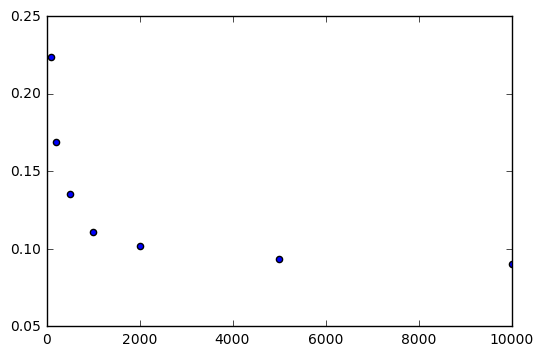

In [35]:
plt.scatter(mnist_validation_sample_sizes, mnist_validation_error_rate)
plt.xlim([0,10000])
plt.show()

The validation error rate decreased and had the lowest error rate of 0.09 at 10,000 samples. 

## SPAM

For the Spam dataset, six Linear SVMs were trained on the MNIST dataset sample sizes of 100, 200, 500, 1,000, 2,000, and 4,138.

In [38]:
spam_linearsvms = {}
spam_vd, spam_vl, spam_td, spam_tl = spam(SPAM_FILEPATH)

In [39]:
for num_samples in [100, 200, 500, 1000, 2000, len(spam_data[2])]:
    s = SVC(kernel='linear')
    s.fit(np.take(spam_td, np.arange(num_samples), 0), np.ravel(np.take(spam_tl, np.arange(num_samples), 0)))
    spam_linearsvms[num_samples] = s

### Training

The printed values are the sample size with the training accuracy score on the Spam dataset.

In [47]:
spam_training_sample_sizes, spam_training_error_rate = [], []
for num_samples, s in spam_linearsvms.items():        
    spam_training_error_rate.append(1 - s.score(spam_td, spam_tl))
    spam_training_sample_sizes.append(num_samples)
    print(num_samples, 1 - spam_training_error_rate[-1])

2000 0.803044949251
1000 0.802803286612
500 0.786370227163
200 0.767037216046
100 0.760512324795
4138 0.8008699855


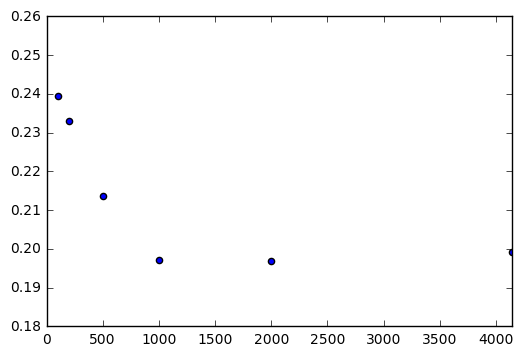

In [49]:
plt.scatter(spam_training_sample_sizes, spam_training_error_rate)
plt.xlim([0, len(spam_data[2])])
plt.show()

The training error rate decreased, but had the lowest error rate of 0.197 at 2000 samples. 

### Validation

The printed values are the sample size with the validation accuracy score on the Spam dataset.

In [54]:
spam_validation_sample_sizes, spam_validation_error_rate = [], []
for num_samples, s in spam_linearsvms.items():        
    spam_validation_error_rate.append(1 - s.score(spam_vd, spam_vl))
    spam_validation_sample_sizes.append(num_samples)
    print(num_samples, 1 - spam_validation_error_rate[-1])

2000 0.804642166344
1000 0.816247582205
500 0.771760154739
200 0.750483558994
100 0.750483558994
4138 0.797872340426


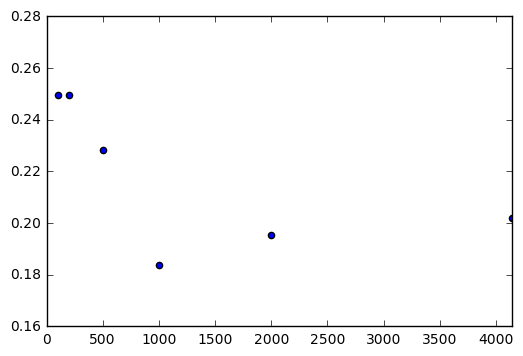

In [55]:
plt.scatter(spam_validation_sample_sizes, spam_validation_error_rate)
plt.xlim([0, len(spam_data[2])])
plt.show()

The validation error rate had the lowest error rate of 0.184 at 1,000 samples. 

## CIFAR-10

For the CIFAR-10 dataset, six Linear SVMs were trained on the MNIST dataset sample sizes of 100, 200, 500, 1,000, 2,000, and 5,000.

In [59]:
cifar10_linearsvms = {}
cifar10_vd, cifar10_vl, cifar10_td, cifar10_tl = cifar10(CIFAR10_FILEPATH)

In [60]:
for num_samples in [100, 200, 500, 1000, 2000, 5000]:
    s = SVC(kernel='linear')
    s.fit(np.take(cifar10_td, np.arange(num_samples), 0), np.ravel(np.take(cifar10_tl, np.arange(num_samples), 0)))
    cifar10_linearsvms[num_samples] = s

### Training

In [61]:
cifar10_training_sample_sizes, cifar10_training_error_rate = [], []
for num_samples, s in cifar10_linearsvms.items():        
    cifar10_training_error_rate.append(1 - s.score(cifar10_td, cifar10_tl))
    cifar10_training_sample_sizes.append(num_samples)
    print(num_samples, 1 - cifar10_training_error_rate[-1])

2000 0.317466666667
1000 0.296911111111
5000 0.374533333333
500 0.278777777778
200 0.228733333333
100 0.2134


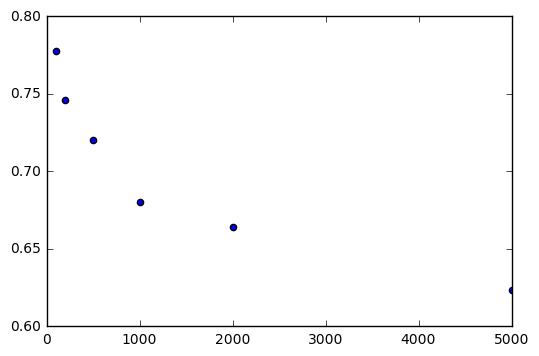

In [62]:
plt.scatter(cifar10_sample_sizes, cifar10_error_rate)
plt.xlim([0,5000])
plt.show()

The training error rate decreased and had the lowest error rate of 0.646 at 5,000 samples. 

### Validation

In [63]:
cifar10_validation_sample_sizes, cifar10_validation_error_rate = [], []
for num_samples, s in cifar10_linearsvms.items():        
    cifar10_validation_error_rate.append(1 - s.score(cifar10_vd, cifar10_vl))
    cifar10_validation_sample_sizes.append(num_samples)
    print(num_samples, 1 - cifar10_validation_error_rate[-1])

2000 0.2958
1000 0.284
5000 0.3
500 0.2712
200 0.2292
100 0.212


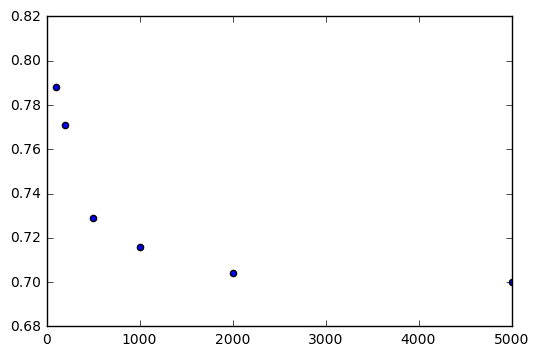

In [64]:
plt.scatter(cifar10_validation_sample_sizes, cifar10_validation_error_rate)
plt.xlim([0,5000])
plt.show()

The validation error rate decreased and had the lowest error rate of 0.7 at 5,000 samples. 

# Problem 3:  MNIST Hyperparameter Tuning

In order to find the best `C` hyperparameter value, I trained many Linear SVMs with different `C` values in different order of magnitude but with the same sample size of 2000. Where `C = 10 ** x`, I tried values of `x` in the range -21 to 2. The best C value was 10E-6.

In [115]:
def mnist_learn(td, tl, C, sample_sizes):
    linearsvms = {}
    for num_samples in sample_sizes:
        s = SVC(C=C, kernel='linear')
        s.fit(np.take(td, np.arange(num_samples), 0), np.ravel(np.take(tl, np.arange(num_samples), 0)))
        linearsvms[num_samples] = s
    return linearsvms

def check_mnist_hyperparameter(x, y, sample_size):
    results = {}
    for C in range(x, y):
        lsvms = mnist_learn(mnist_td, mnist_tl, 10 ** C, [sample_size])
        score = lsvms[sample_size].score(mnist_vd, mnist_vl)
        print(C, score)
        results[C] = score
    return results

mnist_vd, mnist_vl, mnist_td, mnist_tl = mnist(MNIST_FILEPATH)

Below are the C values in order of magnitude (10 ^ x) with its corresponding accuracy with sample size of 2,000

In [26]:
mnist_results_2000 = check_mnist_hyperparameter(-21, 2, 2000)

-21 0.179
-20 0.1794
-19 0.1794
-18 0.1794
-17 0.1794
-16 0.1794
-15 0.1794
-14 0.1794
-13 0.1794
-12 0.1794
-11 0.1794
-10 0.1794
-9 0.1794
-8 0.7969
-7 0.8952
-6 0.9005
-5 0.8891
-4 0.8891
-3 0.8891
-2 0.8891
-1 0.8891
0 0.8891
1 0.8891


Below are the C values in order of magnitude (10 ^ x) with its corresponding accuracy with sample size of 10,000

In [27]:
mnist_results_10000 = check_mnist_hyperparameter(-21, 2, 10000)

-21 0.1128
-20 0.1128
-19 0.1128
-18 0.1128
-17 0.1128
-16 0.1128
-15 0.1128
-14 0.1128
-13 0.1128
-12 0.1128
-11 0.1128
-10 0.1128
-9 0.6595
-8 0.8928
-7 0.9251
-6 0.9317
-5 0.9143
-4 0.9069
-3 0.9069
-2 0.9069
-1 0.9069
0 0.9069
1 0.9069


for C = 10E-6 with 2000 samples had the max succcess rate of 0.9005 and with 10000 samples had the max success rate of 0.9317

# Problem 4: K-Fold Cross-Validation

In order to find the best C hyperparameter value, I trained many Linear SVMs with different C values in different order of magnitude but done with k-fold validation. Where C = 10 ** x, I tried values of x in the range -21 to 3 as well as C=1...10. The best observed C value was 100.

In [7]:
def spam(filepath):
    data = sio.loadmat(filepath)
    order = np.arange(data["training_data"].shape[0])
    np.random.shuffle(order)
    training_data = np.take(data["training_data"], order, 0)
    labels = np.take(data["training_labels"], order, 1).T
    return training_data, labels

spam_training_data, spam_labels = spam(SPAM_FILEPATH)

In [8]:
def spam_k_fold(C, k=5):
    total_score = 0
    kf = KFold(n_splits=k, shuffle=True)
    for train_index, test_index in kf.split(spam_training_data):
        s = SVC(C=C, kernel='linear') 
        s.fit(np.take(spam_training_data, train_index, 0), np.ravel(np.take(spam_labels, train_index, 0)))
        score = s.score(np.take(spam_training_data, test_index, 0), np.take(spam_labels, test_index, 0))
#         print("score is {}".format(score))
        total_score += score

    spam_5_fold_avg_score = total_score / k
#     print("average score is {}".format(spam_5_fold_avg_score))
    return spam_5_fold_avg_score

Below are the C values in order of magnitude (10 ^ x) with its corresponding accuracy with k-fold cross-validation.

In [16]:
spam_C_results = {}
for C in range(-21, 2):
    spam_C_results[C] = spam_k_fold(10 ** C)
    print("C={} success rate is {}".format(C, spam_C_results[C]))

C=-21 success rate is 0.7099748642764369
C=-20 success rate is 0.7099780412823891
C=-19 success rate is 0.70997748063428
C=-18 success rate is 0.7099772937515769
C=-17 success rate is 0.7099786019304982
C=-16 success rate is 0.7099791625786075
C=-15 success rate is 0.7099784150477954
C=-14 success rate is 0.7099765462207646
C=-13 success rate is 0.7099756118072491
C=-12 success rate is 0.7099733692148124
C=-11 success rate is 0.7099769199861706
C=-10 success rate is 0.7099771068688738
C=-9 success rate is 0.7099763593380615
C=-8 success rate is 0.7099729954494063
C=-7 success rate is 0.709980283874826
C=-6 success rate is 0.70997505115914
C=-5 success rate is 0.7099707528569693
C=-4 success rate is 0.7171300423289322
C=-3 success rate is 0.751545426513049
C=-2 success rate is 0.7782279782094768
C=-1 success rate is 0.7958207421112139
C=0 success rate is 0.8023950887225633
C=1 success rate is 0.803558994197292


In [ ]:
spam_C_results = {}
print("Range 2 - 10")
for C in range(2, 11):
    spam_C_results[C] = spam_k_fold(10 ** C)
    print("C={} success rate is {}".format(C, spam_C_results[C]))

Range 2 - 10
C=2 success rate is 0.8054906138162382
C=3 success rate is 0.8031719601192313


The code was left running overnight, and was only able to process up to C=10E3
The best C value seems to be C=10E2 with a sucess rate of 0.80549

Below is the same code, but without shuffling in the `KFold`

In [9]:
def spam_k_fold_no_shuffle(C, k=5):
    total_score = 0
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(spam_training_data):
        s = SVC(C=C, kernel='linear') 
        s.fit(np.take(spam_training_data, train_index, 0), np.ravel(np.take(spam_labels, train_index, 0)))
        score = s.score(np.take(spam_training_data, test_index, 0), np.take(spam_labels, test_index, 0))
        total_score += score

    spam_5_fold_avg_score = total_score / k
    return spam_5_fold_avg_score

In [9]:
spam_C_results_no_shuffle = {}
print("No shuffle")
for C in range(-21, 2):
    spam_C_results_no_shuffle[C] = spam_k_fold_no_shuffle(10 ** C)
    print("C={} success rate is {}".format(C, spam_C_results_no_shuffle[C]))

No shuffle
C=-21 success rate is 0.7099763593380615
C=-20 success rate is 0.7099763593380615
C=-19 success rate is 0.7099763593380615
C=-18 success rate is 0.7099763593380615
C=-17 success rate is 0.7099763593380615
C=-16 success rate is 0.7099763593380615
C=-15 success rate is 0.7099763593380615
C=-14 success rate is 0.7099763593380615
C=-13 success rate is 0.7099763593380615
C=-12 success rate is 0.7099763593380615
C=-11 success rate is 0.7099763593380615
C=-10 success rate is 0.7099763593380615
C=-9 success rate is 0.7099763593380615
C=-8 success rate is 0.7099763593380615
C=-7 success rate is 0.7099763593380615
C=-6 success rate is 0.7099763593380615
C=-5 success rate is 0.7099763593380615
C=-4 success rate is 0.7169364318485503
C=-3 success rate is 0.7511583924349882
C=-2 success rate is 0.7778400097179006
C=-1 success rate is 0.7946630037656863
C=0 success rate is 0.8020110447677515
C=1 success rate is 0.8033642624206918


In [10]:
spam_C_results_no_shuffle = {}
print("2")
for C in range(2, 3):
    spam_C_results_no_shuffle[C] = spam_k_fold_no_shuffle(10 ** C)
    print("C={} success rate is {}".format(C, spam_C_results_no_shuffle[C]))

2
C=2 success rate is 0.8045205057045944


Below are the C values (not in orders of magnitude) with its corresponding accuracy with k-fold cross-validation.

In [10]:
print("Range 1-10")
for C in range(1, 11):
    spam_C_results_no_shuffle[C] = spam_k_fold_no_shuffle(C)
    print("C={} success rate is {}".format(C, spam_C_results_no_shuffle[C]))

Range 1-10
C=1 success rate is 0.8020110447677515
C=2 success rate is 0.8027843653930612
C=3 success rate is 0.8031710257057159
C=4 success rate is 0.80297778899074
C=5 success rate is 0.8029776021080369
C=6 success rate is 0.8035576860183706
C=7 success rate is 0.8031708388230128
C=8 success rate is 0.8033642624206918
C=9 success rate is 0.8033642624206918
C=10 success rate is 0.8033642624206918


# Problem 5: Kaggle

Kaggle Name: cschon

## MNIST

On the Kaggle MNIST dataset, I got a score of 0.94720.


In [10]:
def mnist(filepath):
    data = sio.loadmat(filepath)["trainX"]
    np.random.shuffle(data)
    order = np.arange(data.shape[1] - 1)
    training_data = np.take(data, order, 1)
    labels = np.take(data, [-1], 1)
    return training_data, labels

In [13]:
C = 10 ** -6
mnist_training_data, mnist_labels = mnist(MNIST_FILEPATH)
mnist_svms = mnist_learn(mnist_training_data, mnist_labels, C, [len(mnist_training_data)])

In [59]:
MNIST_FILEPATH = "hw01_data/mnist/test.mat"
mnist_test = sio.loadmat(MNIST_FILEPATH)["testX"]
mnist_pred = mnist_svms[len(mnist_training_data)].predict(mnist_test).astype(int)

In [62]:
f = open('mnist.csv', 'w')
f.write("Id,Category\n")
i = 0
for x in np.nditer(mnist_pred):
    f.write("{},{}\n".format(i, x))
    i += 1
f.close()

## Spam

On the Kaggle Spam dataset, I got a score of 0.86031.  
To get this score, after discussion with my collaborators, I added features to `featurize.py`. These were counting the frequencies of the words or characters: @, prince, sex, and spam.

In [96]:
C = 2
spam_training_data, spam_labels = spam(SPAM_FILEPATH)
spam_svc = SVC(C=10**C, kernel='linear')
spam_svc.fit(np.take(spam_training_data, np.arange(len(spam_training_data)), 0), 
             np.ravel(np.take(spam_labels, np.arange(len(spam_training_data)), 0)))
print("finished")

finished


In [97]:
spam_test = sio.loadmat(SPAM_FILEPATH)['test_data']
spam_pred = spam_svc.predict(spam_test).astype(int)

In [98]:
f = open('spam.csv', 'w')
f.write("Id,Category\n")
i = 0
for x in np.nditer(spam_pred):
    f.write("{},{}\n".format(i, x))
    i += 1
f.close()

## CIFAR-10

In [19]:
def cifar10(filepath):
    data = sio.loadmat(filepath)["trainX"]
    np.random.shuffle(data)
    order = np.arange(data.shape[1] - 1)
    training_data = np.take(data, order, 1)
    labels = np.take(data, [-1], 1)
    return training_data, labels

In [20]:
cifar10_training_data, cifar10_labels = cifar10(CIFAR10_FILEPATH)

In [ ]:
cifar10_svc = SVC(kernel='linear')
cifar10_svc.fit(np.take(cifar10_training_data, np.arange(len(cifar10_training_data)), 0), np.ravel(np.take(cifar10_labels, np.arange(len(cifar10_training_data)), 0)))
